In [13]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import dataframe_image as dfi
import re
from scipy import stats
from pathlib import Path

# directory and file paths
data_dir = Path("../data/")
output_dir = Path("../outputs/")
processed_data_dir = data_dir / "processed"

housing_file = processed_data_dir / "census_housing.csv"
covid_file = processed_data_dir / "COVID-19_Cases.csv"
covid_geo_file = processed_data_dir / "COVID-19_Cases_Geo.csv"
covid_monthly_file = processed_data_dir / "Monthly_COVID-19_Cases_By_MSA.csv"

# COVID-19 Data Visualization

## National COVID-19 Case Count by Month

In [2]:
geo = pd.read_csv(covid_geo_file)
monthly_cases = geo[["case_month","case","hosp","icu","death"]].groupby("case_month").sum()

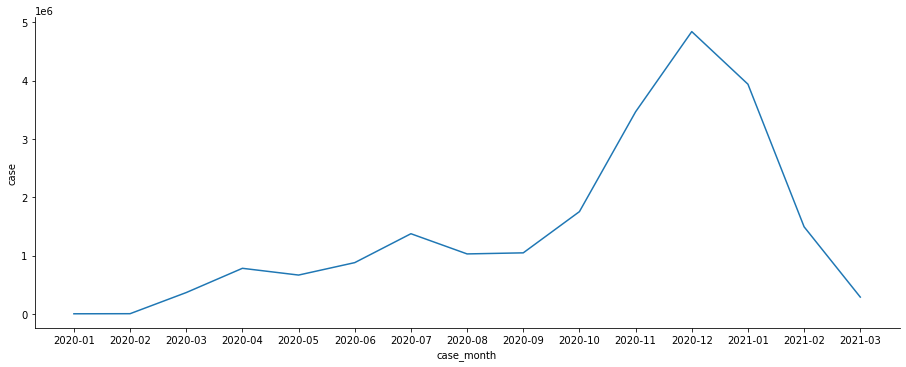

In [3]:
sns.relplot(data=monthly_cases,x=monthly_cases.index,y="case",kind="line",height=5,aspect=2.5)

In [10]:
monthly = pd.read_csv(covid_monthly_file)
monthly_75 = monthly.sort_values(by="population",ascending=False)[:1125] # 75 MSAs x 15 months accounted for
cases_by_msa = monthly_75.pivot_table('cases_per_capita',columns='case_month',index='cbsa_title',aggfunc=sum).fillna(0)
cm = sns.color_palette("flare", as_cmap=True)
cases_by_msa = cases_by_msa.style.background_gradient(cmap=cm)
cases_by_msa

case_month,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03
cbsa_title,,,,,,,,,,,,,,,
"Akron, OH",0.000000,0.000000,0.000436,0.001019,0.000935,0.000823,0.001862,0.001458,0.001478,0.003831,0.008766,0.010138,0.009034,0.005230,0.000991
"Albany-Schenectady-Troy, NY",0.000000,0.000000,0.001285,0.002886,0.003601,0.002063,0.002656,0.002157,0.002121,0.003258,0.006749,0.012068,0.010531,0.004140,0.000911
"Albuquerque, NM",0.000000,0.000000,0.000280,0.000607,0.000851,0.000865,0.002496,0.001652,0.001015,0.004658,0.004281,0.000529,0.000824,0.000536,0.000000
"Allentown-Bethlehem-Easton, PA-NJ",0.000000,0.000000,0.002597,0.005155,0.002246,0.001169,0.001378,0.000854,0.001439,0.003553,0.014165,0.023254,0.019284,0.008297,0.001665
"Atlanta-Sandy Springs-Roswell, GA",0.000000,0.000003,0.000491,0.000947,0.000787,0.001696,0.004562,0.004300,0.002465,0.003356,0.006737,0.014691,0.018929,0.008185,0.001597
"Bakersfield, CA",0.000000,0.000000,0.000299,0.001051,0.001834,0.007399,0.017052,0.005478,0.002471,0.002504,0.010197,0.029025,0.019973,0.005449,0.000567
"Baltimore-Columbia-Towson, MD",0.000000,0.000000,0.000529,0.001760,0.002614,0.001160,0.003470,0.002220,0.002555,0.002755,0.001415,0.000000,0.000000,0.000000,0.000000
"Baton Rouge, LA",0.000000,0.000000,0.000246,0.000902,0.000535,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"Birmingham-Hoover, AL",0.000000,0.000000,0.000778,0.000731,0.001365,0.004081,0.010045,0.007903,0.006268,0.007368,0.014294,0.024167,0.020907,0.006695,0.001622


In [14]:
dfi.export(cases_by_msa,output_dir / 'cases_by_msa.png')